Российской авиакомпании F9, выполняющей внутренние пассажирские перевозки, важно понять предпочтения пользователей, покупающих билеты на разные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**


**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np

In [2]:
#импортируем данные
df1=pd.read_csv('/datasets/query_1.csv')
df2=pd.read_csv('/datasets/query_3.csv') 
df3=pd.read_csv('/datasets/query_last.csv')

In [3]:
#изучим данные в них

df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
#проверим типы данных на корректность
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
df2

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
# проверим, есть ли пропуски 

df2.isna().sum()

city               0
average_flights    0
dtype: int64

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
df2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [10]:
# приведем значения столбца среднее количество полетов к целочисленной форме
df2['average_flights']=df2['average_flights'].astype('int')

In [11]:
df2

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2
...,...,...
96,Чита,1
97,Элиста,4
98,Южно-Сахалинск,4
99,Якутск,2


Вывод: данные изучены, пропусков нет, тип изменили на целочисленный. 

In [12]:
#выберем топ-10 городов по количеству рейсов
top10 = df2.sort_values(by='average_flights', ascending=False).head(10)

In [13]:
top10

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


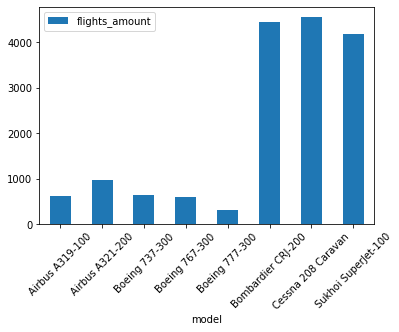

In [14]:
#построим графики: модели самолётов и количество рейсов
df1.plot.bar(x='model',rot=45) #plot(x='model', y='flights_amount', figsize=(15,10))

Вывод: Чем меньше самолет, тем больше рейсов выполняет. 

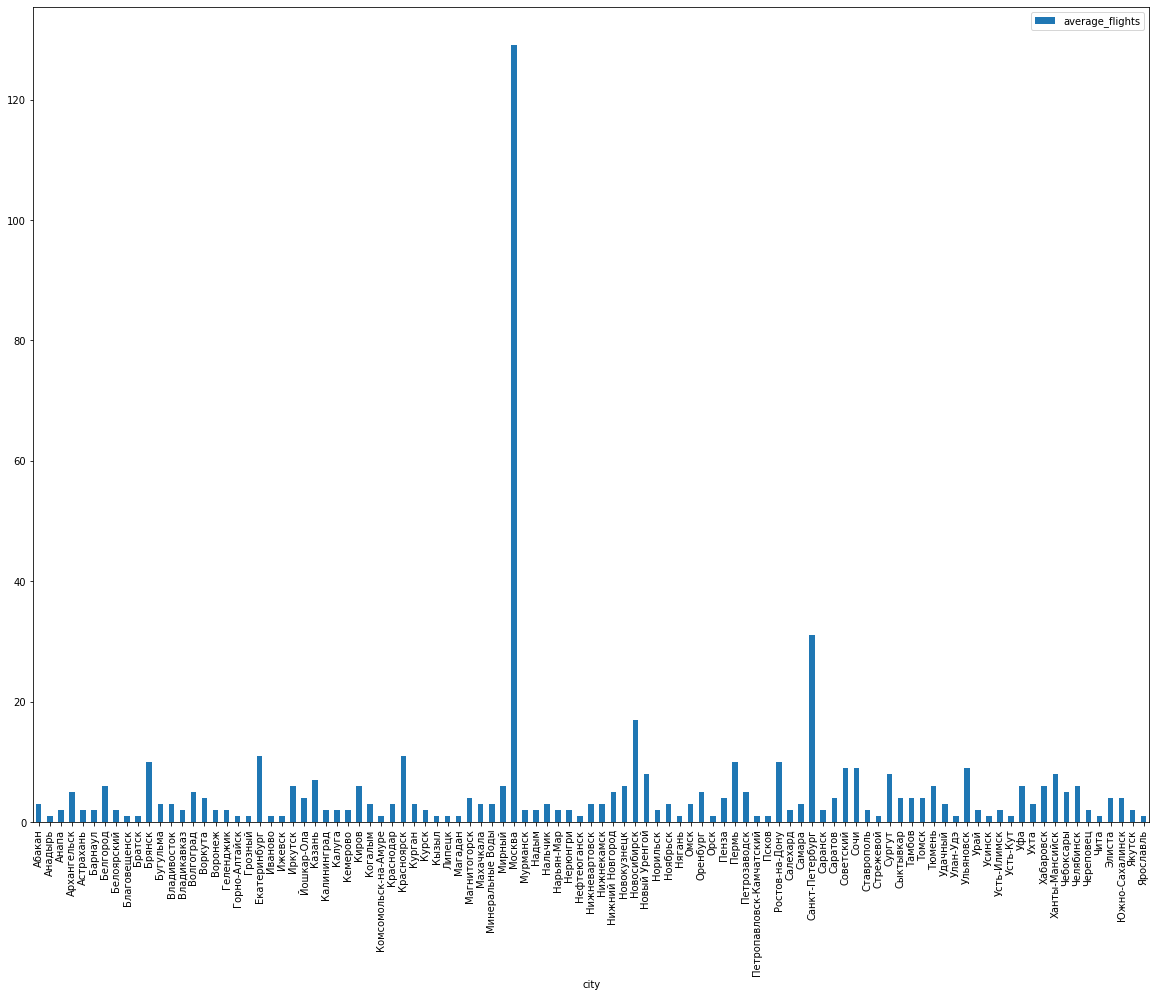

In [15]:
#построим графики: города и количество рейсов

df2.plot.bar(x='city',rot=90, figsize=(20,15))

Вывод: Высокие значения у Москвы и Санкт-Петербурга. У остальных городов примерно на одном уровне. А мой город Пермь вошел в Топ-10!

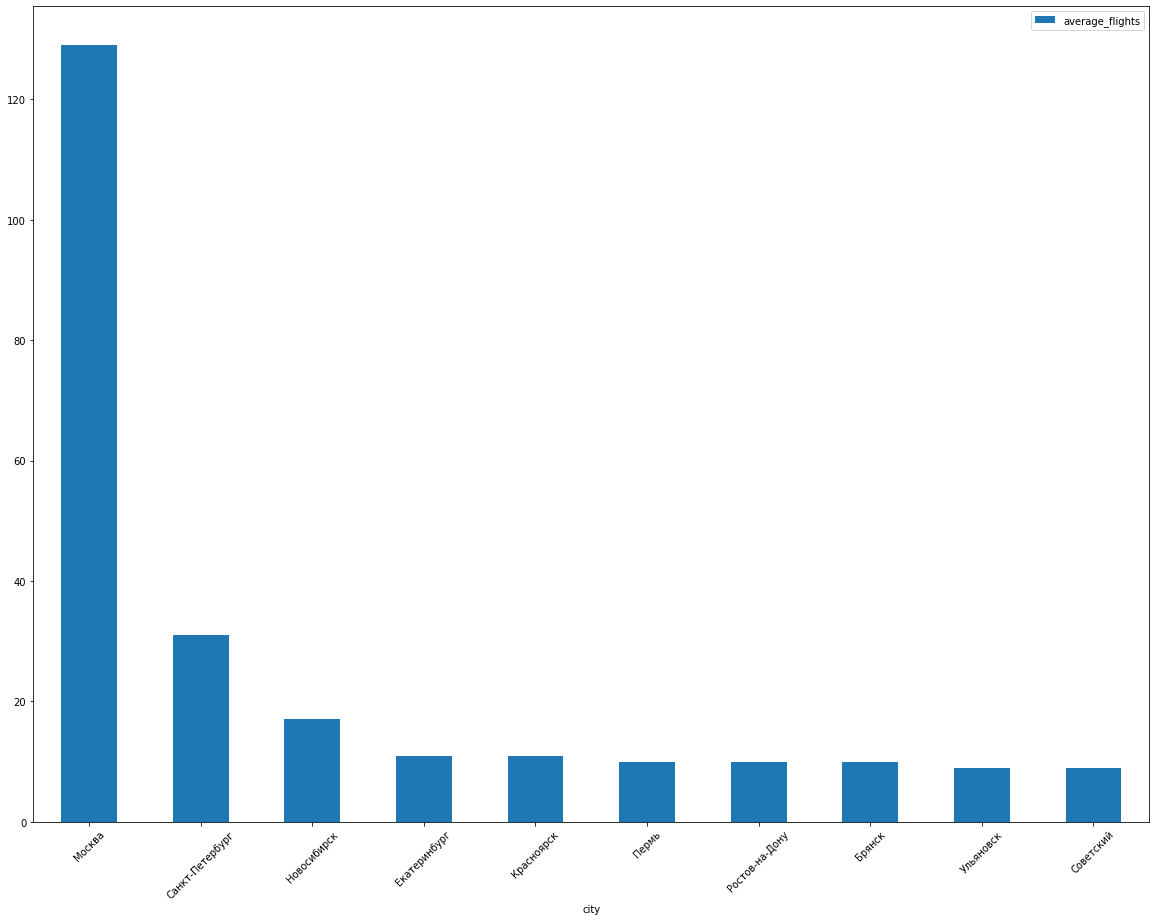

In [16]:
#построим графики: топ-10 городов и количество рейсов

top10.plot.bar(x='city',rot=45, figsize=(20,15))

# 2. Проверка гипотезы

In [17]:
df3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

In [18]:
from scipy import stats as st

# Н0 Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время
# H1 Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время различаются
# Для проверки гипотезы будем использовать t-критерий Стьюдента, так как этот критерий применяется для сравнения средних значений двух независимых между собой выборок, критический уровень статистической значимости 
# alpha = .05, так как объем выборки небольшой

#отсортируем датафрейм по условию наличия и отсутствия фестивалей
df3_without_fest = df3.query('festival_week== "NaN"')
df3_without_fest

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [19]:
df3_with_fest = df3.query('festival_week != "NaN"')
df3_with_fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [20]:
df3_without_fest_mean = df3_without_fest['ticket_amount']
df3_with_fest_mean = df3_with_fest['ticket_amount']

In [21]:
df3_without_fest_mean.describe()

count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64

In [22]:
df3_with_fest_mean.describe()

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

у данных значительно отличается дисперсия

In [23]:
alpha = .05 # критический уровень статистической значимости, так как объем выборки небольшой
#https://www.statmethods.ru/stati/vybor-urovnya-znachimosti-pri-proverke-statisticheskikh-gipotez/
#https://www.machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/
    
results = st.ttest_ind(df3_without_fest_mean, 
    df3_with_fest_mean,equal_var=False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha): #сравним получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.377432493172683
Не получилось отвергнуть нулевую гипотезу


За нулевую гипотезу принимаем положительное предположение о том, что средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время. За альтернативную гипотезу берем: Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время различаются.
Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.

Вывод: Не получилось отвергнуть нулевую гипотезу о том, что средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время.